# Import Dependencies

In [259]:
%run ./../../utilities/model_frameworks/bifrost_neural_engine.ipynb

In [260]:
import pandas as pd

# Examples

## Daily Bike Sharing Predictions (Time Series)

In [274]:
# Load the raw data.
data = pd.read_csv('./../../data/daily_bike_sharing.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Epoch: 14951, Loss: 835.1034545898438 (Prev: 869.9127807617188): 100%|██████████| 15000/15000 [00:35<00:00, 427.29it/s]


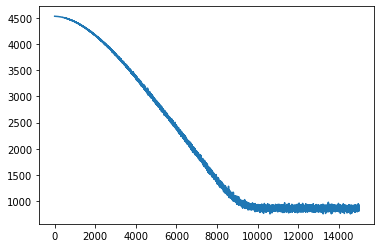

In [278]:
model = BifrostNeuralEngine(data=data,
                            labels_column_names=['cnt'],
                            date_column_name='dteday',
                            layers_config=[30, 35, 30]) \
    .fit(epochs=15000)

In [263]:
prediction_frame = data.copy()[-5:]
prediction_frame = prediction_frame.reset_index().drop('index', axis=1)
prediction_frame['prediction'] = model.predict(prediction_frame)

prediction_frame[['cnt', 'prediction']]

,cnt,prediction
0,2114,4076.135010
1,3095,4427.784180
2,1341,1659.959839
3,1796,3713.463379
4,2729,5198.092773


## DOGE_BTC Price Prediction (Time Series)

In [271]:
data = pd.read_json('./../../data/DOGE_BTC-1h.json')
data.columns = [ 'time', 'open', 'high', 'low', 'close', 'volume' ]
data['time'] = pd.to_datetime(data['time'], unit='ms')
data.head()

,time,open,high,low,close,volume
0,2022-04-04 00:00:00,0.000003,0.000003,0.000003,0.000003,5925148
1,2022-04-04 01:00:00,0.000003,0.000003,0.000003,0.000003,1854562
2,2022-04-04 02:00:00,0.000003,0.000003,0.000003,0.000003,3641510
3,2022-04-04 03:00:00,0.000003,0.000003,0.000003,0.000003,3360431
4,2022-04-04 04:00:00,0.000003,0.000003,0.000003,0.000003,1936457


Epoch: 14951, Loss: 0.04450982064008713 (Prev: 0.044201575219631195): 100%|██████████| 15000/15000 [00:44<00:00, 336.21it/s] 


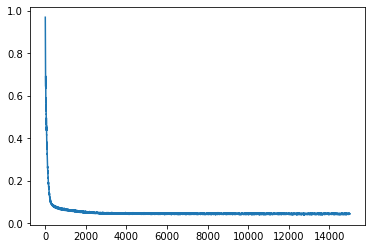

In [272]:
model = BifrostNeuralEngine(data=data,
                            labels_column_names=['close'],
                            date_column_name='time',
                            layers_config=[30, 35, 30]) \
    .fit(epochs=15000)

<AxesSubplot:xlabel='time'>

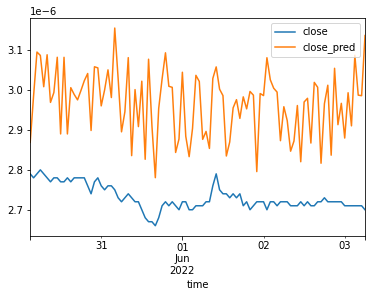

In [273]:
prediction_frame = data.copy()
predictions = model.predict(prediction_frame)
prediction_frame.index = prediction_frame.time
predicted_df = pd.DataFrame(predictions)
predicted_df.columns = ['close']
predicted_df.index = prediction_frame.index
prediction_frame['close_pred'] = predicted_df['close']

prediction_frame[-100:][['close', 'close_pred']].plot()

## Titanic (Binary Classification)

In [267]:
data = pd.read_csv('./../../data/titanic.csv')
data.head()

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1


Epoch: 14951, Loss: 0.08692841976881027 (Prev: 0.08877960592508316): 100%|██████████| 15000/15000 [01:40<00:00, 149.21it/s]


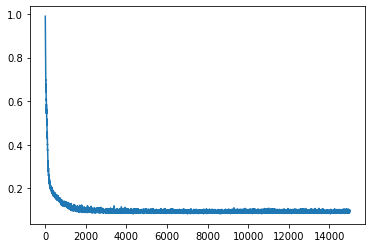

In [268]:
model = BifrostNeuralEngine(data=data,
                            labels_column_names=['Survived'],
                            layers_config=[30, 35, 30]) \
    .fit(epochs=15000)

In [269]:
prediction_frame = data.copy()
predictions = model.predict(prediction_frame)
prediction_frame['Survived_pred'] = np.where(predictions > 0.5, 1, 0)

prediction_frame.head(5)

,Name,PClass,Age,Sex,Survived,Survived_pred
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,0
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,0
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,1
